HoloViews is a [Python](http://python.org) library that makes analyzing and visualizing scientific or engineering data much simpler, more intuitive, and more easily reproducible.  Instead of specifying every step for each plot, HoloViews lets you store your data in an annotated format that is instantly visualizable, with immediate access to both the numeric data *and* its visualization. Examples of how HoloViews is used in Python scripts as well as in live [Jupyter Notebooks](http://jupyter.org) may be accessed directly from the [holoviews-contrib](http://github.com/ioam/holoviews-contrib) repository. Here is a quick example of HoloViews in action:

C:\Users\Radhakrishna\Anaconda3\lib\site-packages\holoviews\core\util.py:27: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  datetime_types = datetime_types + (pd.tslib.Timestamp,)
C:\Users\Radhakrishna\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Radhakrishna\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Radhakrishna\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Radhakrishna\Anaconda3\lib\site-pack

:Layout
   .AdjointLayout.I :AdjointLayout
      :Overlay
         .Image.I :Image   [x,y]   (z)
         .HLine.I :HLine   [x,y]
      :Histogram   [z]   (Frequency)
   .Curve.I         :Curve   [x]   (z)
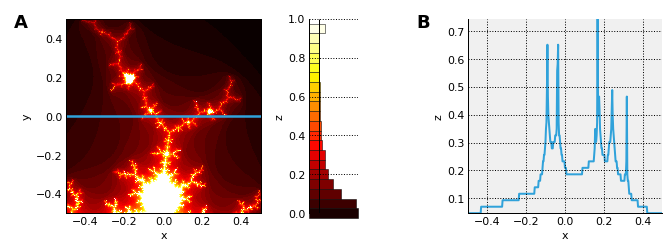

In [1]:
import numpy as np
import holoviews as hv
hv.notebook_extension('matplotlib')
fractal = hv.Image(np.load('mandelbrot.npy'))

((fractal * hv.HLine(y=0)).hist() + fractal.sample(y=0))

Fundamentally, a HoloViews object is just a thin wrapper around your data, with the data always being accessible in its native numerical format, but with the data displaying itself automatically whether alone or alongside or overlaid with other HoloViews objects as shown above. The actual rendering is done using a separate library like [matplotlib](http://matplotlib.org) or [bokeh](http://bokeh.pydata.org), but all of the HoloViews objects can be used without any plotting library available, so that you can easily create, save, load, and manipulate HoloViews objects from within your own programs for later analysis.  HoloViews objects support arbitrarily high dimensions, using continuous, discrete, or categorical indexes and values, with flat or hierarchical organizations, and sparse or dense data formats.  The objects can then be flexibly combined, selected, sliced, sorted, sampled, or animated, all by specifying what data you want to see rather than by writing plotting code. The goal is to put the plotting code into the background, as an implementation detail to be written once and reused often, letting you focus clearly on your data itself in daily work.

## More detailed example

Even extremely complex relationships between data elements can be expressed succinctly in HoloViews, allowing you to explore them with ease:

:Layout
   .Overlay.I   :HoloMap   [Y]
      :Overlay
         .Image.I  :Image   [x,y]   (z)
         .Points.I :Points   [x,y]   (z)
   .Curve.I     :HoloMap   [Y]
      :Curve   [x]   (z)
   .Threshold.I :HoloMap   [Y]
      :Image   [x,y]   (z)
   .Overlay.II  :HoloMap   [Y]
      :Overlay
         .Image.I :Image   [x,y]   (z)
         .Level.I :NdOverlay   [Levels]
            :Contours   [x,y]   (z)
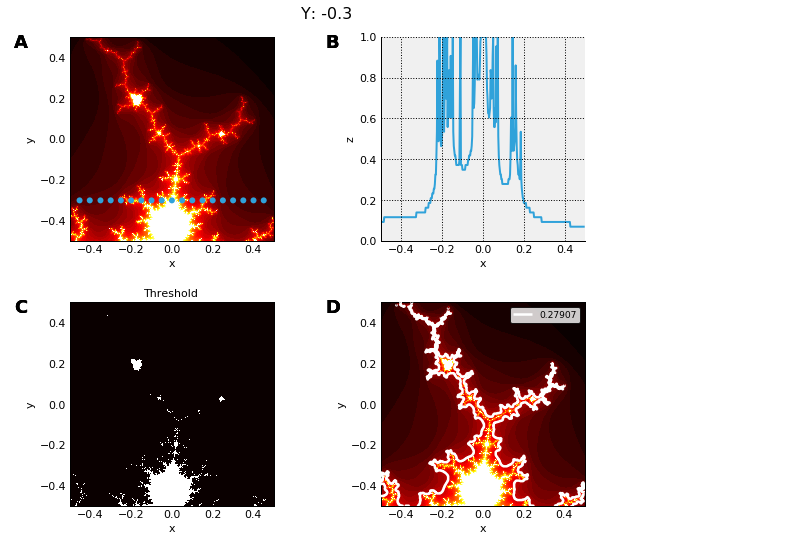
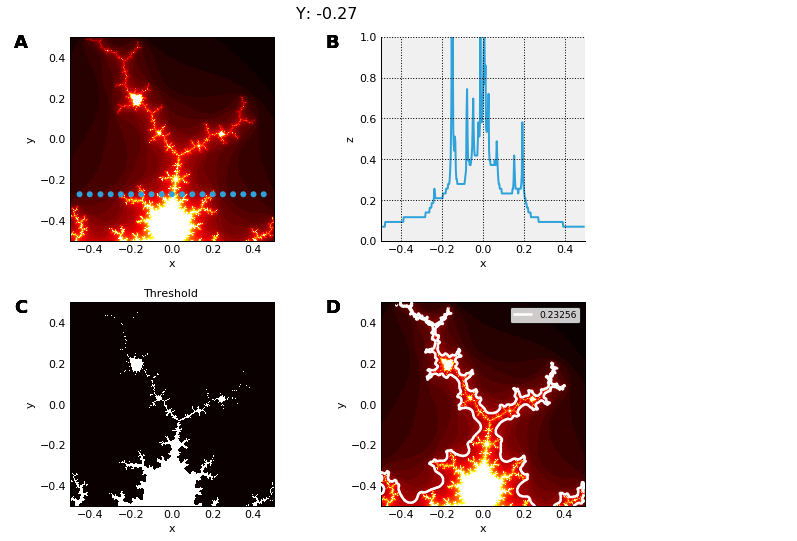
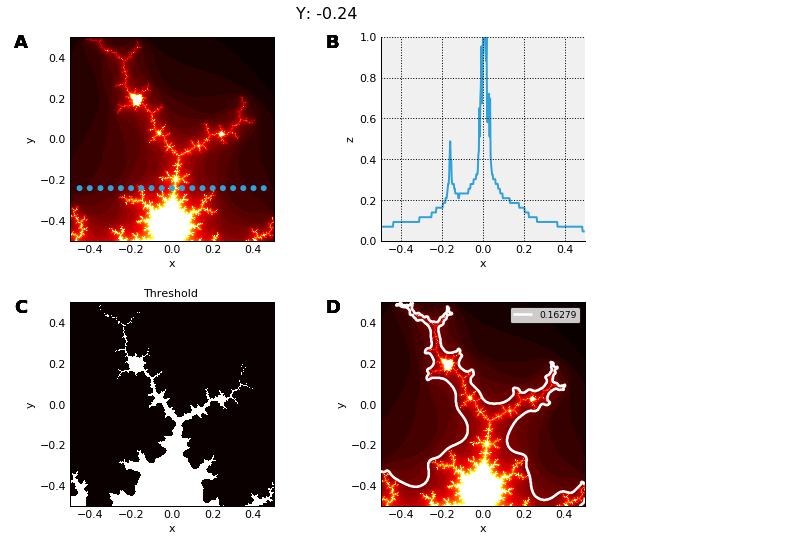
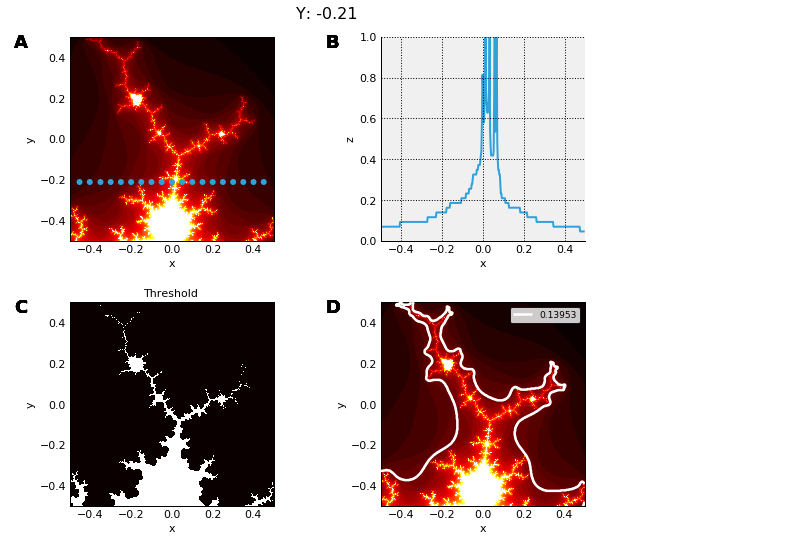
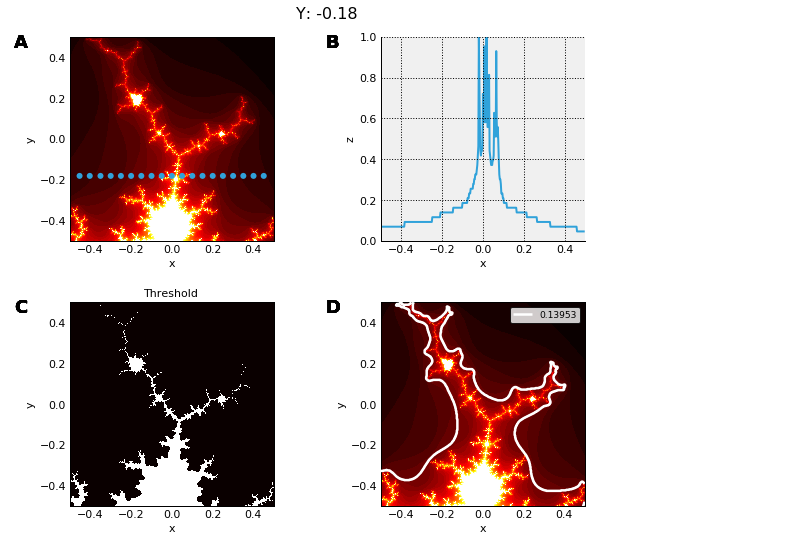
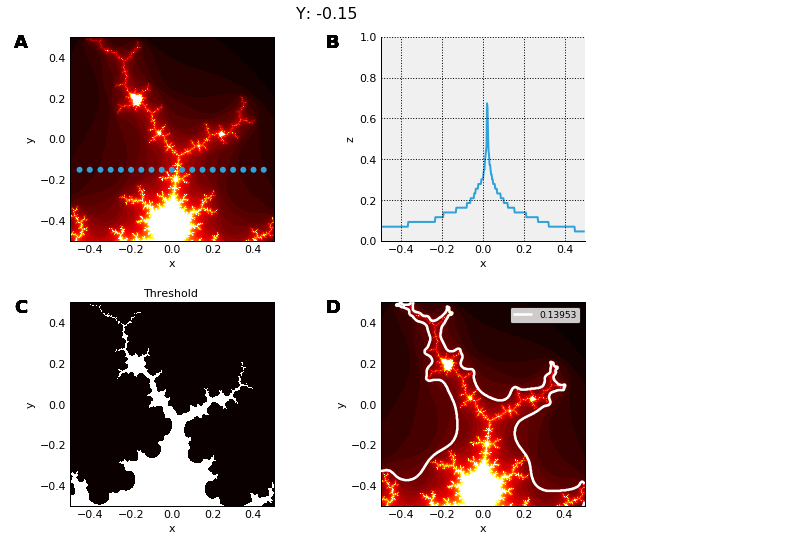
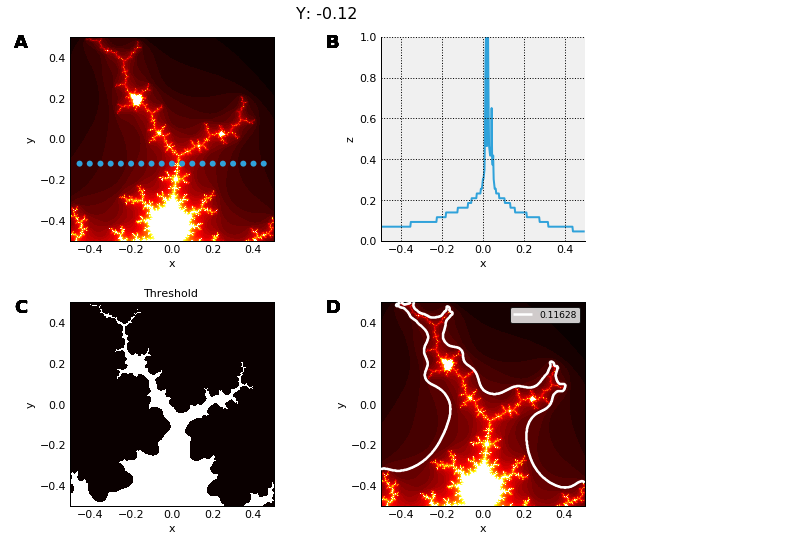
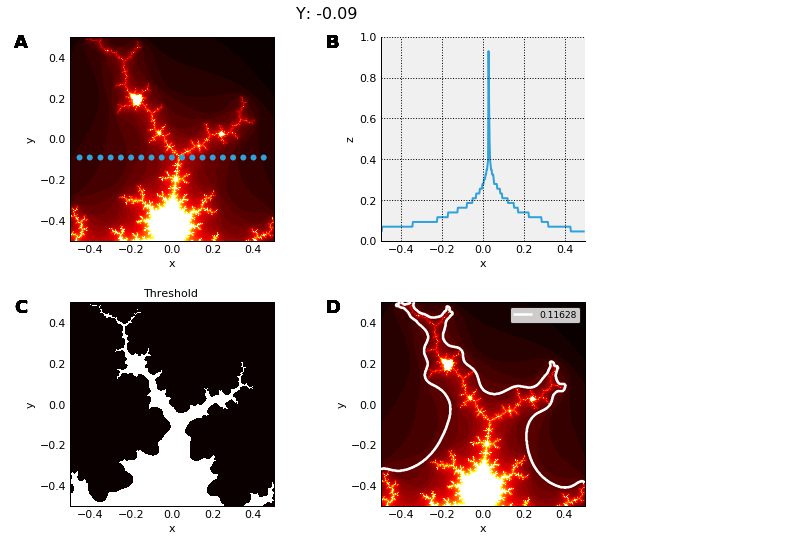
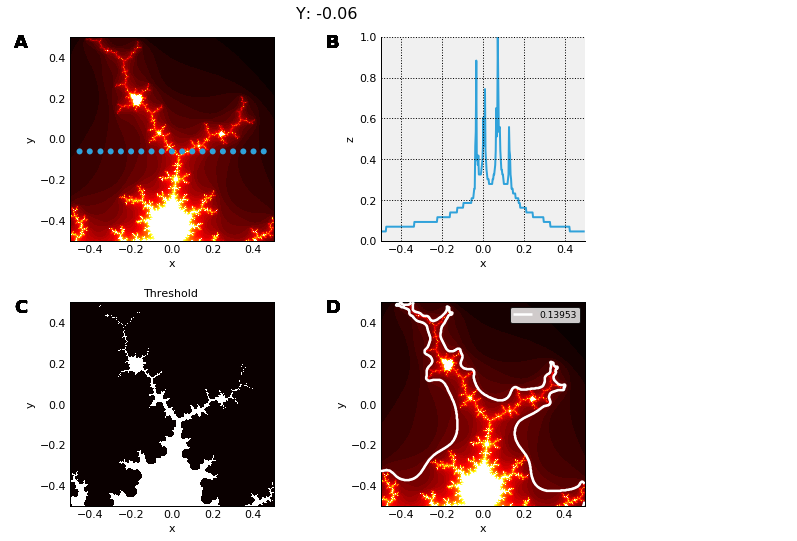
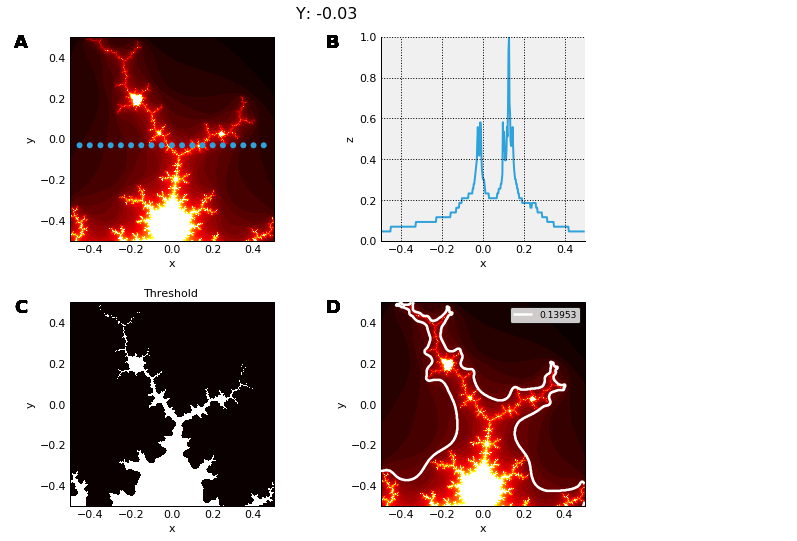
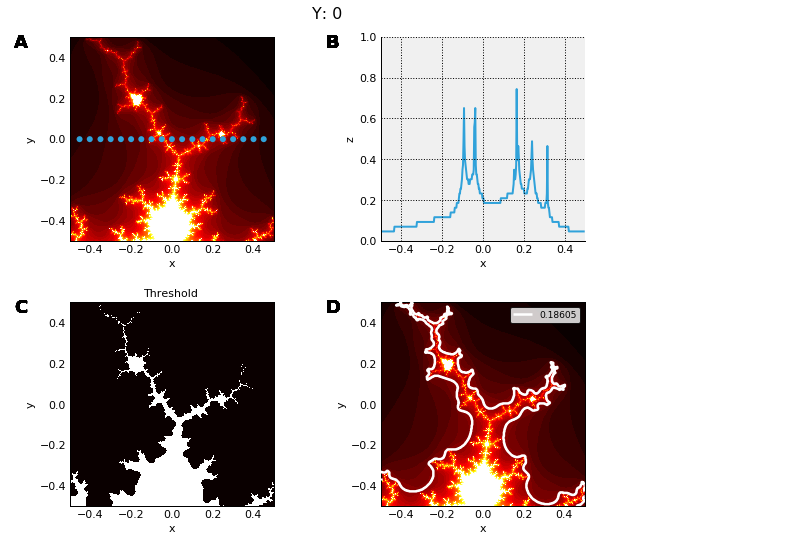
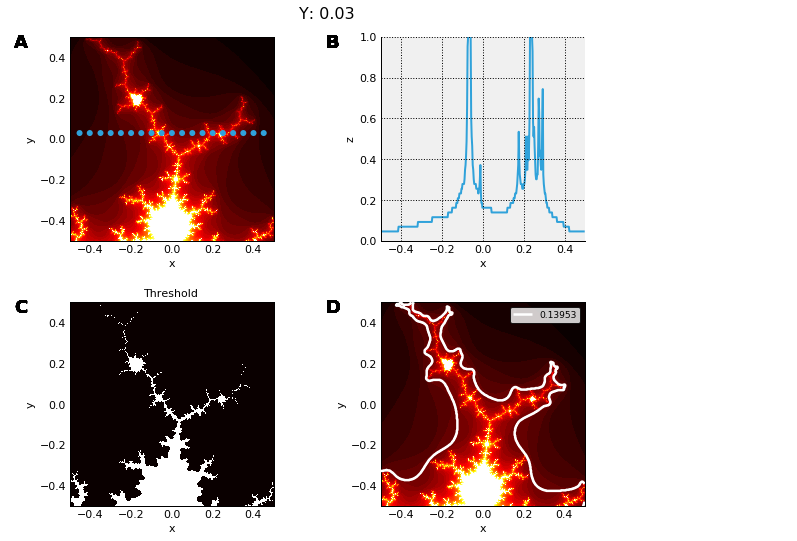
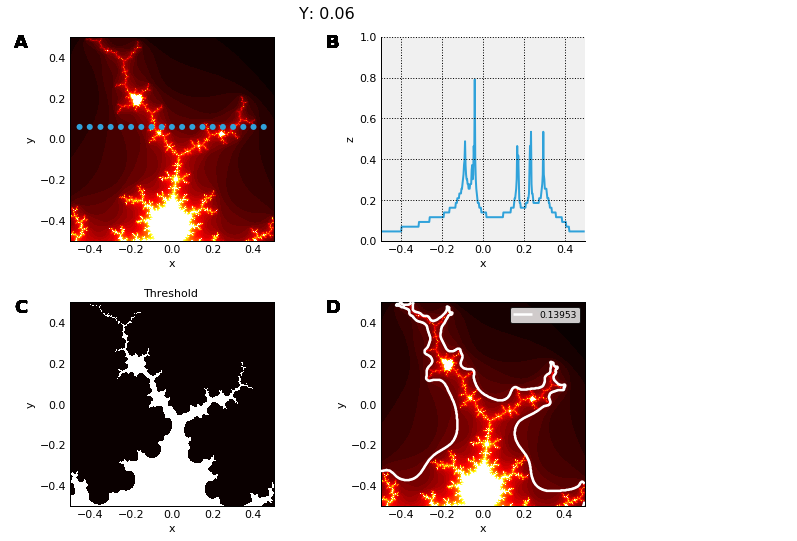
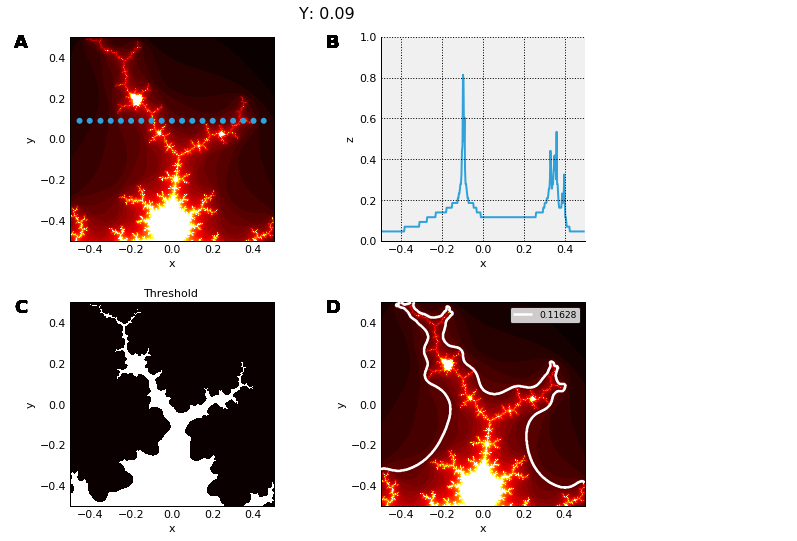
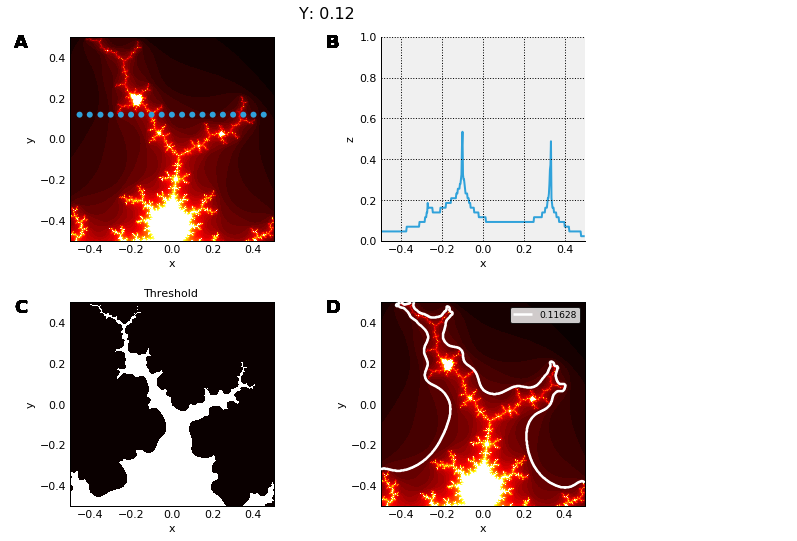
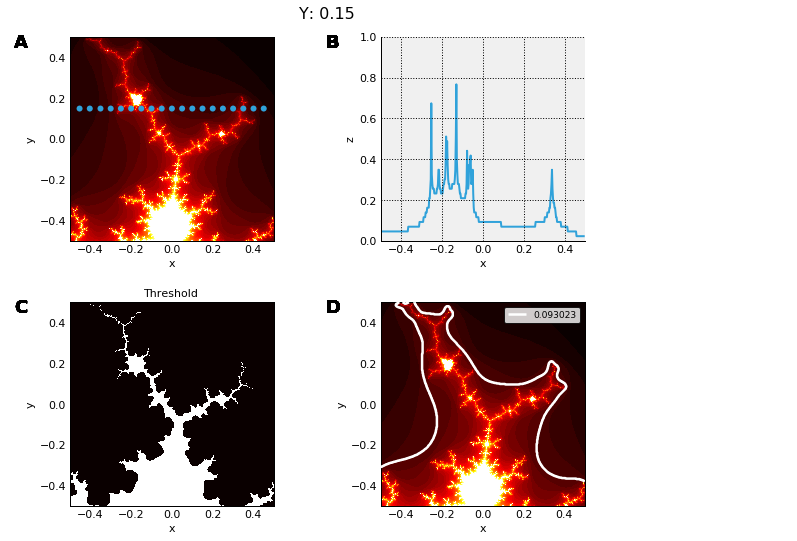
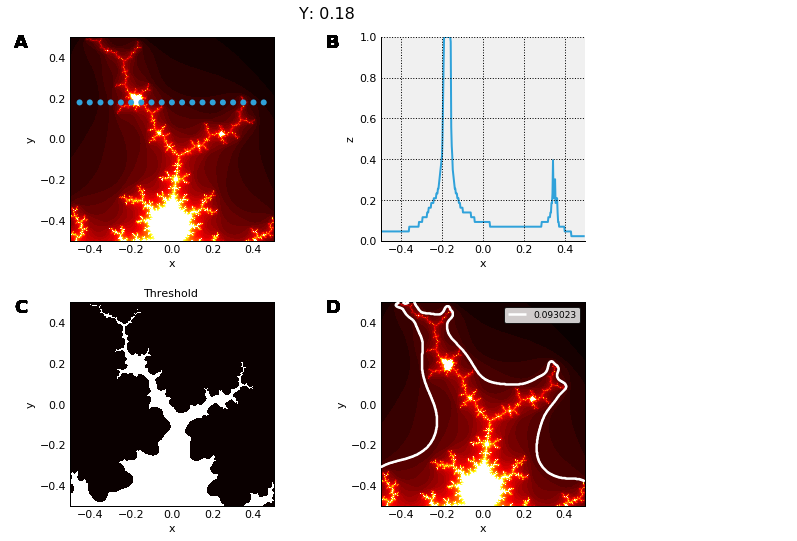
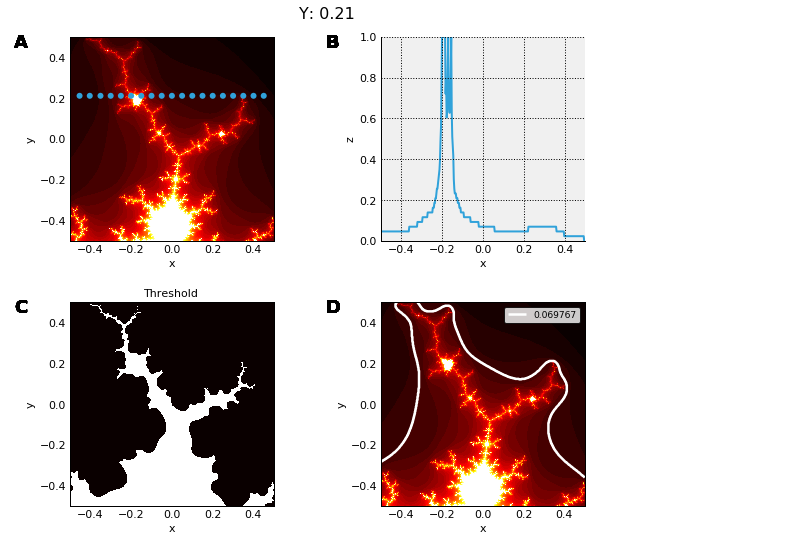
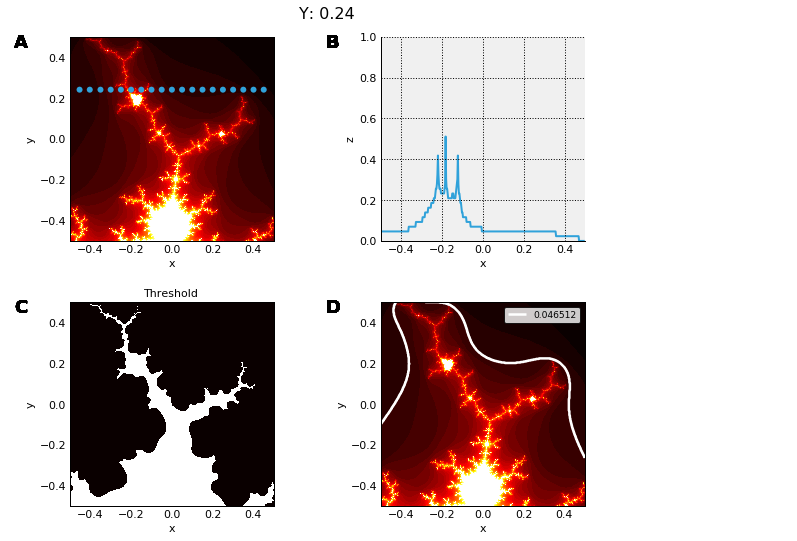
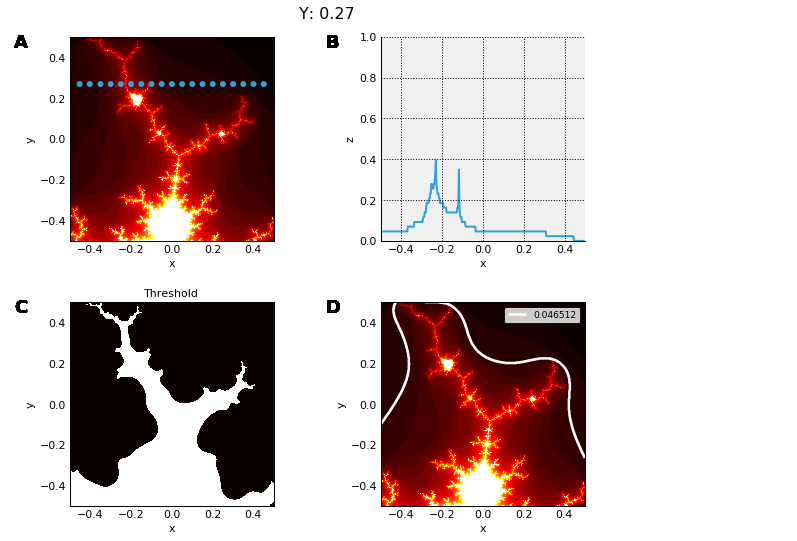
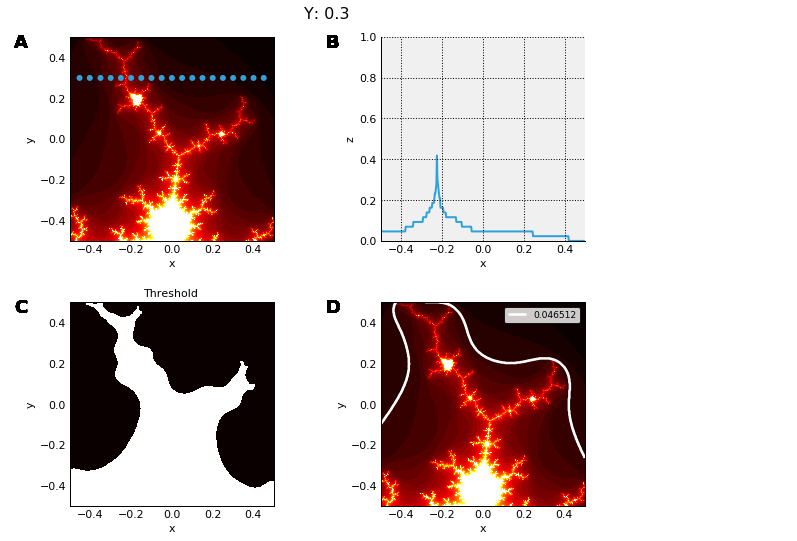

In [2]:
%%opts Points [scaling_factor=50] Contours (color='w')
dots = np.linspace(-0.45, 0.45, 19)

layouts = {y: (fractal * hv.Points(fractal.sample([(i,y) for i in dots])) +
               fractal.sample(y=y) +
               hv.operation.threshold(fractal, level=np.percentile(fractal.sample(y=y)['z'], 90)) +
               hv.operation.contours(fractal, levels=[np.percentile(fractal.sample(y=y)['z'], 60)]))
            for y in np.linspace(-0.3, 0.3, 21)}

hv.HoloMap(layouts, kdims=['Y']).collate().cols(2)

Here we have built a dictionary indexed by a numerical value `y`, containing a set of ``Layout`` objects that are each composed of four HoloViews objects.  We then collated the ``Layout`` objects into a HoloViews data structure that can display arbitrarily high dimensional data.  The result is that in **A** we can see the same fractal data as above, but with a horizontal cross section indicated using a set of dots with sizes proportional to the underlying data values, illustrating how even a simple annotation can be used to reflect other data of interest.  **B** shows a cross-section of the fractal, **C** shows a thresholded version of it, and **D** shows the same data with a contour outline overlaid.  The threshold and contour levels used are not fixed, but are calculated as the 90th or 60th percentile of the data values along the selected cross section, using standard Python/NumPy functions.  All of this data is packaged into a single HoloViews data structure for a range of cross sections, allowing the data for a particular cross section to be revealed by moving the Y-value slider at right.  Even with these complicated interrelationships between data elements, the code still only needs to focus on the data that you want to see, not on the details of the plotting or interactive controls, which are handled by HoloViews and the underlying plotting libraries.

Note that just as the 2D array became a 1D curve automatically by sampling to get the cross section, this entire figure would become a single static frame with no slider bar if you chose a specific ``Y`` value by re-running with ``.select(Y=0.3)`` before ``.cols(2)``.  There is nothing in the code above that adds the slider bar explicitly -- it appears automatically, just because there is an additional dimension of data that has not been laid out spatially.  Additional sliders would appear if there were other dimensions being varied as well, e.g. for parameter-space explorations.

This functionality is designed to complement the [IPython/Jupyter Notebook](http://jupyter.org) interface, though it can be used just as well separately.  This web page and all the [HoloViews Tutorials](Tutorials/) are runnable notebooks, which allow you to interleave text, Python code, and graphical results easily.  With HoloViews, you can put a minimum of code in the notebook (typically one or two lines per subfigure), specifying what you would like to see rather than the details of how it should be plotted.  HoloViews makes the IPython Notebook a practical solution for both exploratory research (since viewing nearly any chunk of data just takes a line or two of code) and for long-term [reproducibility](Tutorials/Exporting.html) of the work (because both the code and the visualizations are preserved in the notebook file forever, and the data and publishable figures can both easily be exported to an archive on disk).  See the [Tutorials](Tutorials/) for detailed examples, and then start enjoying working with your data!